In [22]:
import os 
import pickle
import numpy as np 
import matplotlib.pyplot as plt

In [23]:
traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Emotional Stability', 'Openness']
results_path = "../results"
models = ["rf_regression", "rf_regression_non_pca"]
models_type = ["Random Forest"]
perf_metrics = "perf_metrics_tuned.pkl"

metric1 = "r2"  
metric2 = "rmse"  

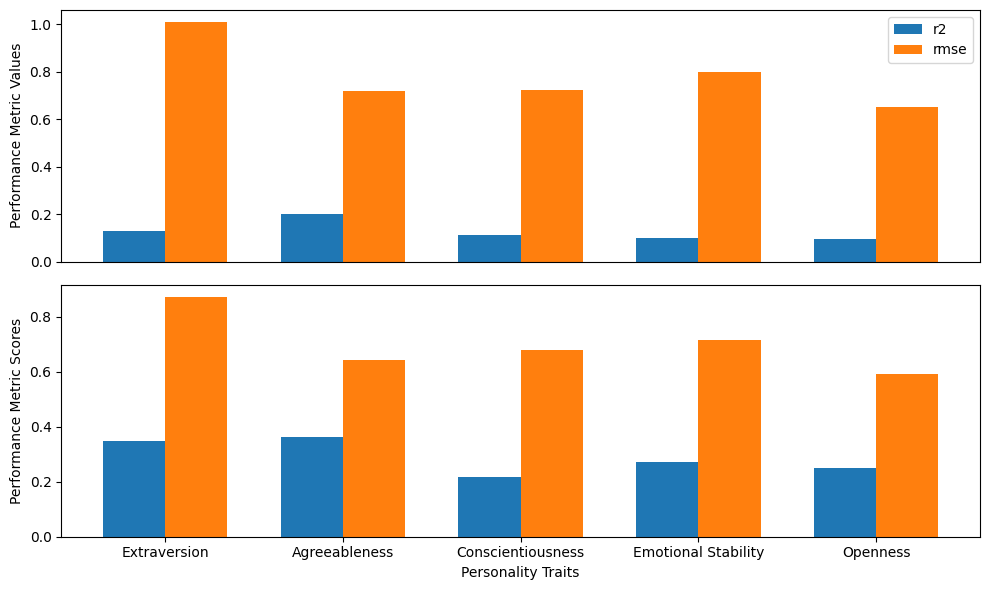

In [24]:
# PCA
all_metrics = {trait: {} for trait in traits}
for trait in traits:
    with open(os.path.join(results_path, models[0], trait, perf_metrics), 'rb') as file:
        output_metrics = pickle.load(file)
        all_metrics[trait][metric1] = output_metrics[metric1]  # Change 'metric1' to the actual key in your metrics data
        all_metrics[trait][metric2] = output_metrics[metric2]  # Change 'metric2' to the actual key in your metrics data

metric1_values = [all_metrics[trait][metric1] for trait in traits]
metric2_values = [all_metrics[trait][metric2] for trait in traits]

fig, ax = plt.subplots(2, 1,figsize=(10, 6))
bar_width = 0.35
index = range(len(traits))
ax[0].bar(index, metric1_values, bar_width, label="r2")
ax[0].bar([i + bar_width for i in index], metric2_values, bar_width, label=metric2)

ax[0].set_ylabel('Performance Metric Values')
ax[0].set_xticks([i + bar_width / 2 for i in index], traits)
ax[0].set_xticks([])
ax[0].legend()

# Non-PCA
all_metrics = {trait: {} for trait in traits}
for trait in traits:
    with open(os.path.join(results_path, models[1], trait, perf_metrics), 'rb') as file:
        output_metrics = pickle.load(file)
        all_metrics[trait][metric1] = output_metrics[metric1]  # Change 'metric1' to the actual key in your metrics data
        all_metrics[trait][metric2] = output_metrics[metric2]  # Change 'metric2' to the actual key in your metrics data

metric1_values = [all_metrics[trait][metric1] for trait in traits]
metric2_values = [all_metrics[trait][metric2] for trait in traits]

bar_width = 0.35
index = range(len(traits))
ax[1].bar(index, metric1_values, bar_width, label="r2")
ax[1].bar([i + bar_width for i in index], metric2_values, bar_width, label=metric2)

ax[1].set_xlabel('Personality Traits')
ax[1].set_ylabel('Performance Metric Scores')
ax[1].set_xticks([i + bar_width / 2 for i in index], traits)

# Show the plot
plt.tight_layout()
plt.savefig('figures/regression_performance_plots.png')
plt.show()